<a href="https://colab.research.google.com/github/hyunwoojang1/Projects/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from scipy.stats import chi2_contingency
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Column Analysis

In [ ]:
## Join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(train)
dataset = pd.concat(objs = [train,test], axis = 0).reset_index(drop = True)

In [ ]:
dataset = dataset.fillna(np.nan)

dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


In [ ]:
dataset.shape

(2919, 81)

In [ ]:
flag = 0
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    flag +=1
    print(f"Count of Null Values in {col.ljust(15)}: {dataset[col].isnull().sum()}")

print("_________________________________________________")
print("There are ", flag,"col contain Null values")

Count of Null Values in MSZoning       : 4
Count of Null Values in LotFrontage    : 486
Count of Null Values in Alley          : 2721
Count of Null Values in Utilities      : 2
Count of Null Values in Exterior1st    : 1
Count of Null Values in Exterior2nd    : 1
Count of Null Values in MasVnrType     : 1766
Count of Null Values in MasVnrArea     : 23
Count of Null Values in BsmtQual       : 81
Count of Null Values in BsmtCond       : 82
Count of Null Values in BsmtExposure   : 82
Count of Null Values in BsmtFinType1   : 79
Count of Null Values in BsmtFinSF1     : 1
Count of Null Values in BsmtFinType2   : 80
Count of Null Values in BsmtFinSF2     : 1
Count of Null Values in BsmtUnfSF      : 1
Count of Null Values in TotalBsmtSF    : 1
Count of Null Values in Electrical     : 1
Count of Null Values in BsmtFullBath   : 2
Count of Null Values in BsmtHalfBath   : 2
Count of Null Values in KitchenQual    : 1
Count of Null Values in Functional     : 2
Count of Null Values in FireplaceQu    :

Find out their dtypes and if it is categorical variable print out the unique output.

In [ ]:
for col in dataset.columns:
  print(f"Datatype of {col.ljust(20)} : {dataset[col].dtypes}")

Datatype of Id                   : int64
Datatype of MSSubClass           : int64
Datatype of MSZoning             : object
Datatype of LotFrontage          : float64
Datatype of LotArea              : int64
Datatype of Street               : object
Datatype of Alley                : object
Datatype of LotShape             : object
Datatype of LandContour          : object
Datatype of Utilities            : object
Datatype of LotConfig            : object
Datatype of LandSlope            : object
Datatype of Neighborhood         : object
Datatype of Condition1           : object
Datatype of Condition2           : object
Datatype of BldgType             : object
Datatype of HouseStyle           : object
Datatype of OverallQual          : int64
Datatype of OverallCond          : int64
Datatype of YearBuilt            : int64
Datatype of YearRemodAdd         : int64
Datatype of RoofStyle            : object
Datatype of RoofMatl             : object
Datatype of Exterior1st          : objec

In [ ]:
for col in dataset.columns:
  if dataset[col].dtypes == 'object':
    print(f"Unique output of {col.ljust(20)} : {dataset[col].unique()}")

Unique output of MSZoning             : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Unique output of Street               : ['Pave' 'Grvl']
Unique output of Alley                : [nan 'Grvl' 'Pave']
Unique output of LotShape             : ['Reg' 'IR1' 'IR2' 'IR3']
Unique output of LandContour          : ['Lvl' 'Bnk' 'Low' 'HLS']
Unique output of Utilities            : ['AllPub' 'NoSeWa' nan]
Unique output of LotConfig            : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique output of LandSlope            : ['Gtl' 'Mod' 'Sev']
Unique output of Neighborhood         : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique output of Condition1           : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique output of Condition2           : ['Norm' 'Artery' 'RRNn' 'Feedr' 'Pos

## 2.0 Plan of Filling NA in MasVnrType

Firstly, since I don't have domain knowledge I don't know what is the correaltional variable of the target columns.

So I will fill in the NA with median if the number of NA values are less than 200.

And then I will compare target column and other rest of columns individually.

Then only use who has more than 0.3 correlation score.

### 2.0.1 Filling NA with Median

In [ ]:
for col in dataset.columns:
  if dataset[col].isnull().sum() >0:
    if dataset[col].isnull().sum() < 200:
      if dataset[col].dtypes == 'int64' or dataset[col].dtypes == 'float64':
        dataset[col] = dataset[col].fillna(dataset[col].median())
      elif dataset[col].dtypes == 'object':
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [ ]:
flag = 0
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    flag +=1
    print(f"Count of Null Values in {col.ljust(15)}: {dataset[col].isnull().sum()}")

print("_________________________________________________")
print("There are ", flag,"col contain Null values")

Count of Null Values in LotFrontage    : 486
Count of Null Values in Alley          : 2721
Count of Null Values in MasVnrType     : 1766
Count of Null Values in FireplaceQu    : 1420
Count of Null Values in PoolQC         : 2909
Count of Null Values in Fence          : 2348
Count of Null Values in MiscFeature    : 2814
Count of Null Values in SalePrice      : 1459
_________________________________________________
There are  8 col contain Null values


### 2.0.2 Drop the columns

Then if the NA value is more then 2000 just drop that column

In [ ]:
for col in dataset.columns:
  if dataset[col].isnull().sum() > 2000:
    dataset.drop(col, axis = 1, inplace = True)

In [ ]:
flag = 0
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    flag +=1
    print(f"Count of Null Values in {col.ljust(15)}: {dataset[col].isnull().sum()}")

print("_________________________________________________")
print("There are ", flag,"col contain Null values")

Count of Null Values in LotFrontage    : 486
Count of Null Values in MasVnrType     : 1766
Count of Null Values in FireplaceQu    : 1420
Count of Null Values in SalePrice      : 1459
_________________________________________________
There are  4 col contain Null values


### 2.0.3 Check rest of them are actually important variable or not


SalePrice's NA value are comes from the test set so we have 3 columns to deal with it.

Before that lets check that those columns actually affect the sales price or no.

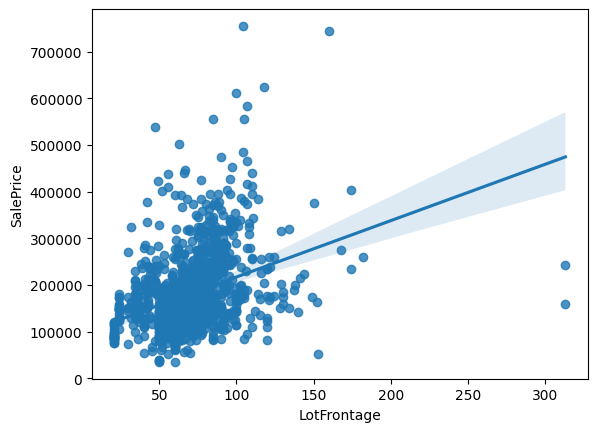

In [ ]:
g = sns.regplot(x = 'LotFrontage', y = 'SalePrice', data = dataset)

I will just put median on NA values

In [ ]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

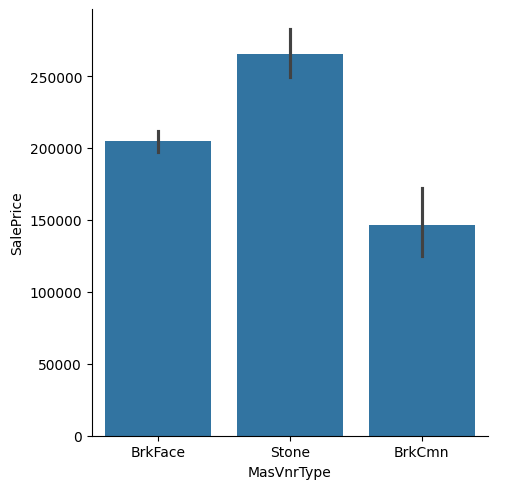

In [ ]:
g = sns.catplot(x = 'MasVnrType', y = 'SalePrice', kind = 'bar', data = dataset)

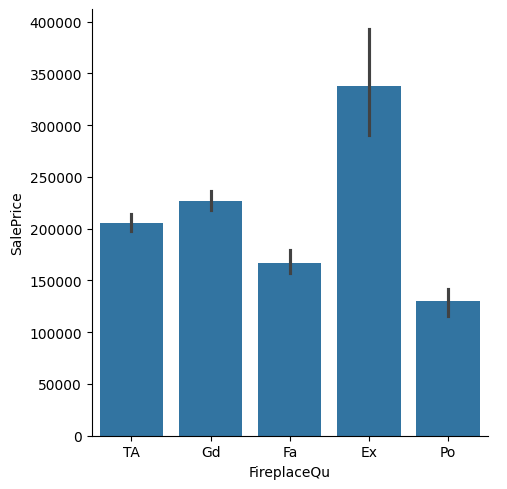

In [ ]:
g = sns.catplot(x = 'FireplaceQu', y = 'SalePrice', kind = 'bar', data = dataset)

### 2.0.4 Making a Model to find correlation variable

calculate the correlation score between target and other variables.

For the target variabel is categorical I will split the comparision by categorical and numeric

In [ ]:
# Target(categorical) vs other variable(categorical)
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def cramer_score(dataset, target_column):
  cat_columns = []

  for col in dataset.columns:
    if dataset[col].dtypes == 'object':
      cat_columns.append(col)
  cat_columns.remove(target_column)

  col_dict = {}
  for col in cat_columns:
    score = cramers_v(dataset[col], dataset[target_column])
    if score > 0.2:
      col_dict[col] = score

  return col_dict

In [ ]:
# Target(categorical) vs other variable(numeric)

def mutual_info_correlation(dataset, target_column):
    num_features = dataset.select_dtypes(include=["number"]).columns
    X = dataset[num_features]
    y = dataset[target_column]

    X = X.fillna(-9999)
    y = y.fillna("Missing")

    mi_scores = mutual_info_classif(X, y, discrete_features=False)
    return dict(sorted(zip(num_features, mi_scores), key=lambda item: item[1], reverse=True))

## 2.1 Fill NA in MasVnrType

In [ ]:
# Before I drop I would like to know that MasVnrType, FireplaceQu is necessary data or not.

dataset['MasVnrType'].describe()

,MasVnrType
count,1153
unique,3
top,BrkFace
freq,879


In [ ]:
dataset['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
MasVnrType_corr = cramer_score(dataset, 'MasVnrType')
MasVnrType_corr

{'Neighborhood': 0.35533927720676745,
 'Exterior1st': 0.28136907964749575,
 'Exterior2nd': 0.2565051980556205,
 'ExterQual': 0.2134345441417955,
 'Foundation': 0.20511673830136662,
 'BsmtQual': 0.23948837955172586,
 'KitchenQual': 0.24001789763182693,
 'FireplaceQu': 0.2883287875825106,
 'SaleType': 0.23274010527402458,
 'SaleCondition': 0.2582628858333062}

In [ ]:
MasVnrType_mi_scores = mutual_info_correlation(dataset, "MasVnrType")
MasVnrType_mi_scores  # 높은 값일수록 중요한 숫자형 변수

{'MasVnrArea': 0.6596001368366013,
 'YearBuilt': 0.1866256349541171,
 'GarageYrBlt': 0.1628053249971877,
 'GarageArea': 0.1487034776553866,
 '1stFlrSF': 0.1403652816117662,
 'YearRemodAdd': 0.1368470568711746,
 'TotalBsmtSF': 0.13631202283207156,
 'OverallQual': 0.13456527440684685,
 'GrLivArea': 0.10220605772720526,
 'MSSubClass': 0.09586566622239845,
 'LotFrontage': 0.09563755881023872,
 'LotArea': 0.09149410018338,
 'GarageCars': 0.08919473243296583,
 'BsmtFinSF1': 0.07069303870304156,
 'Id': 0.06664672495211343,
 '2ndFlrSF': 0.06327131329450952,
 'WoodDeckSF': 0.05098296346482534,
 'BsmtUnfSF': 0.05036943580003683,
 'OpenPorchSF': 0.049344828198641055,
 'FullBath': 0.04605135566906715,
 'OverallCond': 0.04521528649572293,
 'SalePrice': 0.03758860786997964,
 'TotRmsAbvGrd': 0.0283211942634769,
 'BsmtFullBath': 0.020884579142139925,
 'EnclosedPorch': 0.02005471678972004,
 'Fireplaces': 0.019981040672500283,
 'LowQualFinSF': 0.014827101853497338,
 'BsmtHalfBath': 0.013162350540714352,

I will choose whose mi_scores are bigger than 0.1

In [ ]:
MasVnrType_mi_scores_chosen = {}
for col, score in MasVnrType_mi_scores.items():
  if score > 0.1:
    MasVnrType_mi_scores_chosen[col] = score
MasVnrType_mi_scores_chosen

{'MasVnrArea': 0.6596001368366013,
 'YearBuilt': 0.1866256349541171,
 'GarageYrBlt': 0.1628053249971877,
 'GarageArea': 0.1487034776553866,
 '1stFlrSF': 0.1403652816117662,
 'YearRemodAdd': 0.1368470568711746,
 'TotalBsmtSF': 0.13631202283207156,
 'OverallQual': 0.13456527440684685,
 'GrLivArea': 0.10220605772720526}

In [ ]:
merge_corr = {**MasVnrType_corr, **MasVnrType_mi_scores_chosen}
merge_corr

{'Neighborhood': 0.35533927720676745,
 'Exterior1st': 0.28136907964749575,
 'Exterior2nd': 0.2565051980556205,
 'ExterQual': 0.2134345441417955,
 'Foundation': 0.20511673830136662,
 'BsmtQual': 0.23948837955172586,
 'KitchenQual': 0.24001789763182693,
 'FireplaceQu': 0.2883287875825106,
 'SaleType': 0.23274010527402458,
 'SaleCondition': 0.2582628858333062,
 'MasVnrArea': 0.6596001368366013,
 'YearBuilt': 0.1866256349541171,
 'GarageYrBlt': 0.1628053249971877,
 'GarageArea': 0.1487034776553866,
 '1stFlrSF': 0.1403652816117662,
 'YearRemodAdd': 0.1368470568711746,
 'TotalBsmtSF': 0.13631202283207156,
 'OverallQual': 0.13456527440684685,
 'GrLivArea': 0.10220605772720526}

I would use those variables to predict MasVnrType Nan values by using RandomForest

In [ ]:
features = list(merge_corr.keys())
target = 'MasVnrType'

In [ ]:
data_MVT = dataset[dataset['MasVnrType'].notna()]

X = data_MVT[features]
y = data_MVT['MasVnrType']

X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      BrkCmn       0.00      0.00      0.00         7
     BrkFace       0.87      0.98      0.92       176
       Stone       0.88      0.60      0.72        48

    accuracy                           0.87       231
   macro avg       0.58      0.53      0.55       231
weighted avg       0.84      0.87      0.85       231



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Anaylsis**

Since BrkCmn has only 7 in the training set it breaks the all scores.

I would choose SMOTE for over-sampling

In [ ]:
data_MVT = dataset[dataset['MasVnrType'].notna()]

X = data_MVT[features]
y = data_MVT['MasVnrType']

X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# SMOTE/ Over-Sampling
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      BrkCmn       0.00      0.00      0.00         7
     BrkFace       0.87      0.98      0.92       176
       Stone       0.88      0.60      0.72        48

    accuracy                           0.87       231
   macro avg       0.58      0.53      0.55       231
weighted avg       0.84      0.87      0.85       231



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Still I got 0 on BrkCmn...

In [ ]:
prediction_MVT = dataset[dataset['MasVnrType'].isna()]

X = prediction_MVT[features]
X = pd.get_dummies(X, drop_first = True)

X = X.reindex(columns=X_train.columns, fill_value=0)

y_pred = rf.predict(X)

dataset.loc[dataset['MasVnrType'].isna(), 'MasVnrType'] = y_pred

In [ ]:
print(dataset['MasVnrType'].isna().sum())  # NaN 값이 모두 채워졌는지 확인
print(dataset['MasVnrType'].value_counts())

0
MasVnrType
BrkFace    2515
Stone       378
BrkCmn       26
Name: count, dtype: int64


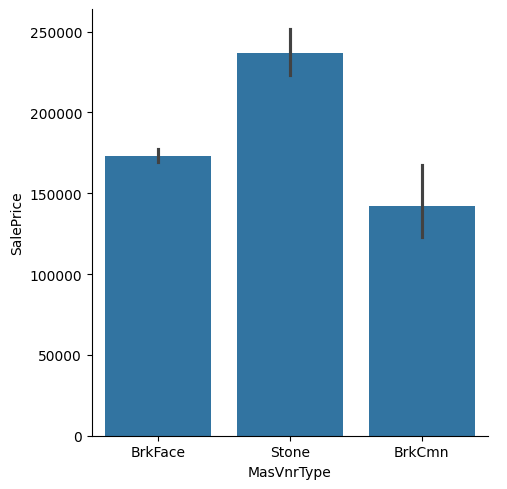

In [ ]:
g = sns.catplot(x = 'MasVnrType', y = 'SalePrice', kind = 'bar', data = dataset)

## 2.2 Fill Na in FireplaceQu

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


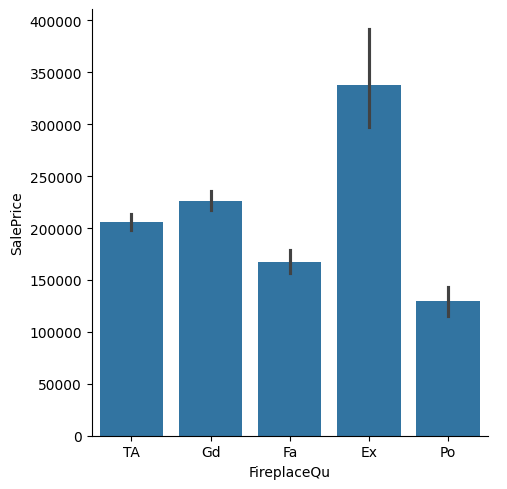

In [ ]:
g = sns.catplot( x = 'FireplaceQu', y = 'SalePrice', data= dataset, kind = 'bar')

Since FireplaceQU is also playing important role we need to make another Machine learning model to predict NA values in that.

To do that I will put Fireplace, heating, heatingQC, OverallQual, TotRmsAbvGrd, GrLivArea, Fireplaces, BldgType, HouseStyle, MasVnrType, Neighborhood, YearBuilt, YearRemodAdd as a correlation columns.

In [ ]:
FireplaceQu_corr = cramer_score(dataset, 'FireplaceQu')
FireplaceQu_corr

{'Neighborhood': 0.32617431968677585,
 'Exterior1st': 0.22277663284755578,
 'Exterior2nd': 0.21146397530997554,
 'MasVnrType': 0.2388096587816772,
 'ExterQual': 0.23197268583682953,
 'BsmtQual': 0.21979602092317382,
 'KitchenQual': 0.22858712799685557}

In [ ]:
FireplaceQu_mi_scores = mutual_info_correlation(dataset, "FireplaceQu")
FireplaceQu_mi_scores  # 높은 값일수록 중요한 숫자형 변수

{'Fireplaces': 0.6882724255086308,
 'YearBuilt': 0.2141867250851892,
 'GarageYrBlt': 0.17767466603932047,
 'GrLivArea': 0.1772387096167496,
 'OverallQual': 0.1733952668343517,
 'YearRemodAdd': 0.15671729133135281,
 'GarageArea': 0.13889071558195365,
 'TotalBsmtSF': 0.1321202780528945,
 '1stFlrSF': 0.1258427263577362,
 'MSSubClass': 0.11447057468416544,
 'GarageCars': 0.10965373835347636,
 'SalePrice': 0.10849541003350227,
 'Id': 0.10799244011788689,
 'LotArea': 0.09434506503437845,
 'WoodDeckSF': 0.09400559621504989,
 'TotRmsAbvGrd': 0.08918064774191636,
 'BsmtFinSF1': 0.08441304877574218,
 'LotFrontage': 0.0830966378392648,
 '2ndFlrSF': 0.07965530844135804,
 'FullBath': 0.068627020715466,
 'MasVnrArea': 0.06438905540294249,
 'OpenPorchSF': 0.06309407263062417,
 'BsmtUnfSF': 0.05173517232503366,
 'HalfBath': 0.04132156460033709,
 'BsmtHalfBath': 0.038399452765097486,
 'BedroomAbvGr': 0.034609550747300766,
 'BsmtFullBath': 0.024132243089157956,
 'EnclosedPorch': 0.0226796674815839,
 'Ki

In [ ]:
FireplaceQu_mi_scores_chosen = {}
for col, score in FireplaceQu_mi_scores.items():
  if score > 0.1:
    FireplaceQu_mi_scores_chosen[col] = score
del FireplaceQu_mi_scores_chosen['SalePrice']
del FireplaceQu_mi_scores_chosen['Id']

FireplaceQu_mi_scores_chosen

{'Fireplaces': 0.6882724255086308,
 'YearBuilt': 0.2141867250851892,
 'GarageYrBlt': 0.17767466603932047,
 'GrLivArea': 0.1772387096167496,
 'OverallQual': 0.1733952668343517,
 'YearRemodAdd': 0.15671729133135281,
 'GarageArea': 0.13889071558195365,
 'TotalBsmtSF': 0.1321202780528945,
 '1stFlrSF': 0.1258427263577362,
 'MSSubClass': 0.11447057468416544,
 'GarageCars': 0.10965373835347636}

In [ ]:
merge_corr_FireplaceQu = {**FireplaceQu_corr, **FireplaceQu_mi_scores_chosen}
merge_corr_FireplaceQu

{'Neighborhood': 0.32617431968677585,
 'Exterior1st': 0.22277663284755578,
 'Exterior2nd': 0.21146397530997554,
 'MasVnrType': 0.2388096587816772,
 'ExterQual': 0.23197268583682953,
 'BsmtQual': 0.21979602092317382,
 'KitchenQual': 0.22858712799685557,
 'Fireplaces': 0.6882724255086308,
 'YearBuilt': 0.2141867250851892,
 'GarageYrBlt': 0.17767466603932047,
 'GrLivArea': 0.1772387096167496,
 'OverallQual': 0.1733952668343517,
 'YearRemodAdd': 0.15671729133135281,
 'GarageArea': 0.13889071558195365,
 'TotalBsmtSF': 0.1321202780528945,
 '1stFlrSF': 0.1258427263577362,
 'MSSubClass': 0.11447057468416544,
 'GarageCars': 0.10965373835347636}

In [ ]:
feature = list(merge_corr_FireplaceQu.keys())
target = 'FireplaceQu'

In [ ]:
train_data = dataset[dataset[target].notna()]

X = train_data[feature]
y = train_data[target]

X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf= RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          Ex       0.00      0.00      0.00         3
          Fa       0.40      0.20      0.27        10
          Gd       0.77      0.90      0.83       156
          Po       0.40      0.20      0.27        10
          TA       0.77      0.69      0.72       121

    accuracy                           0.76       300
   macro avg       0.47      0.40      0.42       300
weighted avg       0.74      0.76      0.74       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
predict_data = dataset[dataset[target].isna()]

X = predict_data[feature]
X = pd.get_dummies(X, drop_first = True)
X = X.reindex(columns = X_train.columns, fill_value = 0)

y_pred = rf.predict(X)

dataset.loc[dataset[target].isna(), target] = y_pred

In [ ]:
print(dataset['FireplaceQu'].isnull().sum())
print(dataset['FireplaceQu'].describe())

0
count     2919
unique       5
top         Gd
freq      1574
Name: FireplaceQu, dtype: object


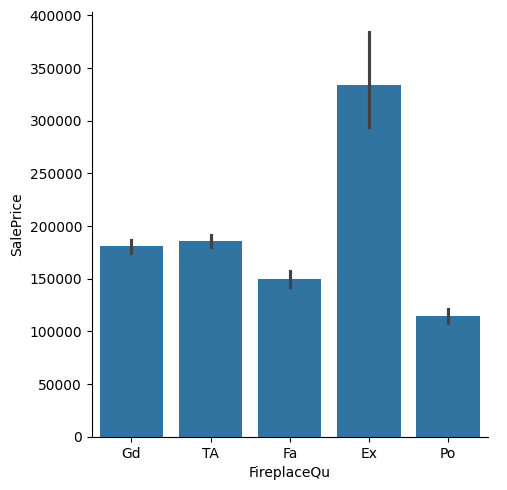

In [ ]:
g = sns.catplot(x = 'FireplaceQu', y = 'SalePrice', data = dataset, kind = 'bar')

In [ ]:
flag = 0
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    flag +=1
    print(f"Count of Null Values in {col.ljust(15)}: {dataset[col].isnull().sum()}")

print("_________________________________________________")
print("There are ", flag,"col contain Null values")

Count of Null Values in SalePrice      : 1459
_________________________________________________
There are  1 col contain Null values


Now we have done with filling Na values

# Feature Engineering